In [5]:
# IMPORT IT ALL

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import xlrd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from scipy.linalg import svd

In [15]:
# Set the data equal to some variables so we can use them later
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

# Remove observations / attributes with too many NaN or missing values
train = train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [57]:
tempTrain = train

# Get most common elemnts for each column and fill the missing values with that element
def getMostCommonElements(df):
    biggestElement = 0
    #biggestElementByColumn = [] # if we want a list
    
    # Get the most common element by using size(), which returns the element and how common it is
    for column in df:
        colSize = df.groupby([column]).size()
        
        # Get every element in colSize and find the most common element
        for i in colSize:
            if i > biggestElement:
                biggestElement = i
                
        #biggestElementByColumn.append(biggestElement) # if we want a list
        tempTrain[column] = tempTrain[column].fillna(biggestElement)
        biggestElement = 0

getMostCommonElements(train)

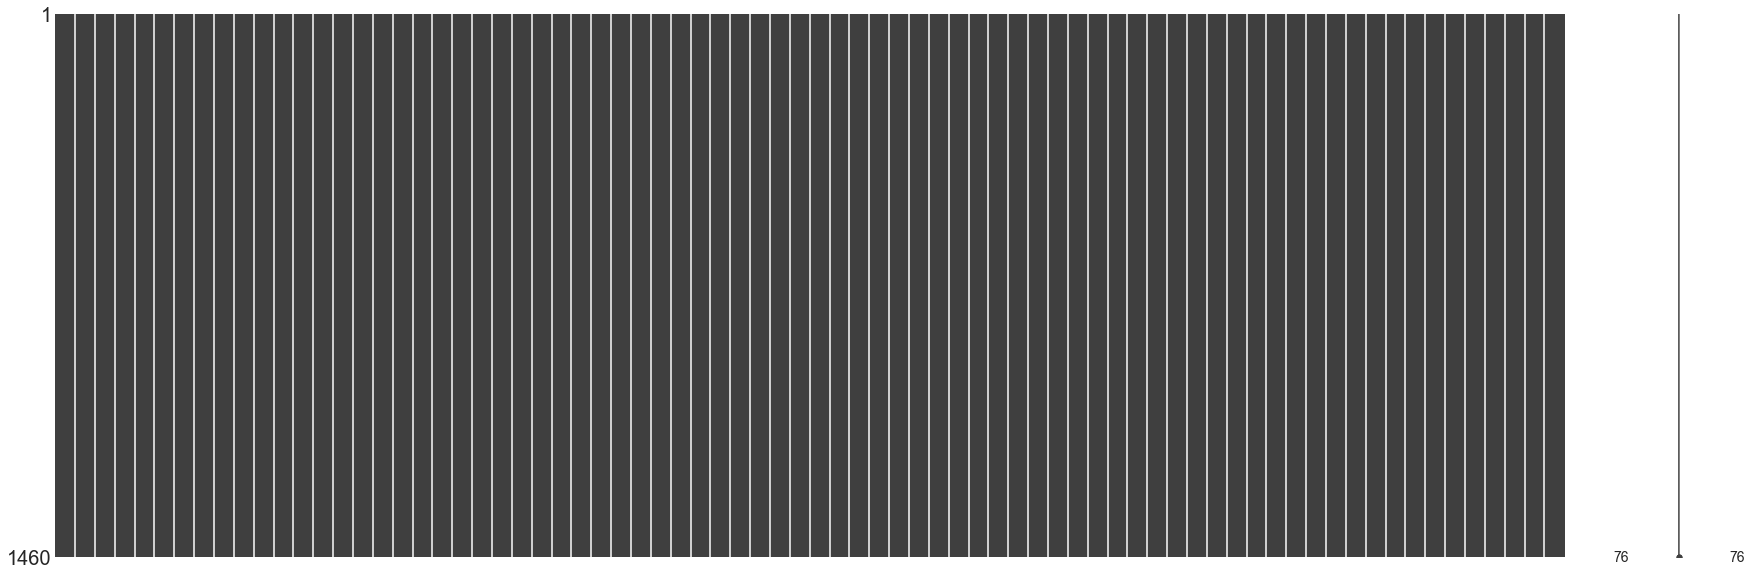

In [60]:
missingno.matrix(tempTrain, figsize = (30,10))

In [9]:
'''
def oneHotEncodeData(df):
    for column in df:
        print(df[column])

oneHotEncodeData(train)
'''

'\ndef oneHotEncodeData(df):\n    for column in df:\n        print(df[column])\n\noneHotEncodeData(train)\n'

In [10]:
# Get values from df
'''
raw_data = train.get_values()
cols = range(0,80)

# Get all columns
X = raw_data[:,cols]
print(X)

# normalize : subtract mean and divide by std
N = len(X)
Y = X - np.ones((N,1))#*X.mean(axis=0)
Y

Y = Y*(1/np.std(Y,0))

# compute the singular value decomposition with svd
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()
'''

"\nraw_data = train.get_values()\ncols = range(0,80)\n\n# Get all columns\nX = raw_data[:,cols]\nprint(X)\n\n# normalize : subtract mean and divide by std\nN = len(X)\nY = X - np.ones((N,1))#*X.mean(axis=0)\nY\n\nY = Y*(1/np.std(Y,0))\n\n# compute the singular value decomposition with svd\nU,S,V = svd(Y,full_matrices=False)\n\n# Compute variance explained by principal components\nrho = (S*S) / (S*S).sum()\n\nthreshold = 0.9\n\n# Plot variance explained\nplt.figure()\nplt.plot(range(1,len(rho)+1),rho,'x-')\nplt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')\nplt.plot([1,len(rho)],[threshold, threshold],'k--')\nplt.title('Variance explained by principal components');\nplt.xlabel('Principal component');\nplt.ylabel('Variance explained');\nplt.legend(['Individual','Cumulative','Threshold'])\nplt.grid()\nplt.show()\n"